<a href="https://colab.research.google.com/github/astrovishalthakur/MachineLearning/blob/main/LogisticRegression/SoftmaxRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [12]:
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species']) # label encoder makes numerical columns, 1, 2, 3,-----n.

In [13]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
df = df[['sepal_length','petal_length','species']]
df.head()

,sepal_length,petal_length,species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [15]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [17]:
clf = LogisticRegression(multi_class='multinomial') # mulit_class = multinomial means we are telling sklearn to perform softmax regression

In [18]:
clf.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial')

In [19]:
y_pred = clf.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9666666666666667


In [20]:
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1,2
0,14,0,0
1,0,7,1
2,0,0,8


In [22]:
import warnings
warnings.filterwarnings("ignore")

In [23]:
# prediction
query = np.array([[3.4,2.7]])
clf.predict_proba(query)  # predict_prob tells probability of all classes

array([[7.25957888e-01, 2.73627865e-01, 4.14246954e-04]])

In [24]:
clf.predict(query) # this gives class with having max value of probability

array([0])

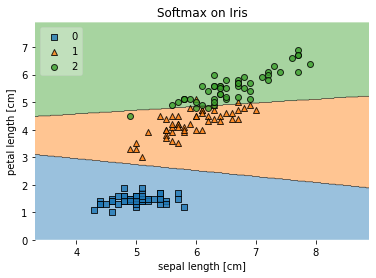

In [29]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X.values, y.values, clf, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('Softmax on Iris')

plt.show()